# The Perceptron

A perceptron is a linear classifier that iteratively computes the w that defines a hyperplane

In [754]:
import numpy as np
from matplotlib import pyplot as plt

In [755]:
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([[0], [0], [0], [1]])
print(f"Training data (features shape{X_train.shape}):\n{X_train}\n")
print(f"Training data (labels, shape{y_train.shape}):\n{y_train}")

Training data (features shape(4, 2)):
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

Training data (labels, shape(4, 1)):
[[0]
 [0]
 [0]
 [1]]


### Plotting data points

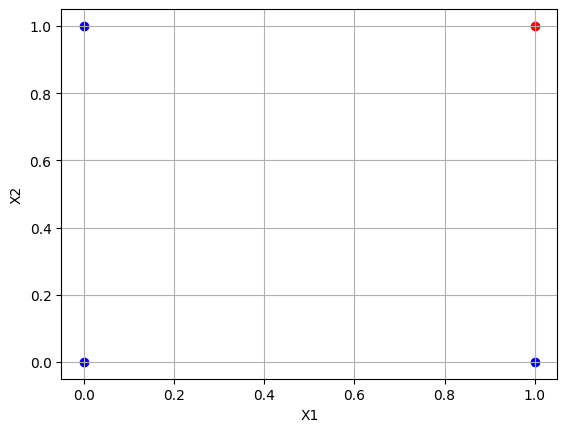

In [756]:
def plot_data(x: np.array, y: np.array) -> None:
    for i in range(len(X_train)):
        if y[i][0] == 0:
            plt.scatter(x[i][0], x[i][1], color='blue', label='Class 0')
        else: 
            plt.scatter(x[i][0], x[i][1], color='red', label='Class 1')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid(True)
    plt.show()
plot_data(X_train, y_train)

### Step and linear function

In [757]:
def step(x: np.array) -> np.array:
    return np.where(x >= 0.0, 1, 0)

In [758]:
def linear(x: np.array, m: float, b: float) -> np.array:
    return x * m + b

### Variant 1: Handle weights and bias together

In [759]:
class Perceptron:
    def __init__(self, num_features: int) -> None:
        self.W = np.random.rand(num_features + 1, 1)    # (num_features + 1) x 1

    def __call__(self, X: np.array) -> int:
        bias_column = np.full((X.shape[0], 1), 1.0)
        X_b = np.hstack((X, bias_column)) 
        return step(np.dot(X_b, self.W))

    def train(self, X: np.array, y: np.array, epochs: int = 1, verbose: bool=True) -> None:
        for epoch in range(epochs):
            for i in range(len(X)):
                # Add bias.
                x = np.append(X[i:i+1], np.array([[1.0]]), axis=1)
                
                # Forward pass
                z = np.dot(x, self.W)
                if y[i] != step(z):
                    if z < 0.0:
                        self.W = self.W + x.T
                    else:
                        self.W = self.W - x.T
            if verbose:
                if epoch % 1 == 0:
                    print(f"Epoch: {epoch}\tLoss: {(y[i] - z).item()}")

In [760]:
and_gate = Perceptron(2)
print(f"Weights:\n{and_gate.W}\n")

Weights:
[[0.7673082 ]
 [0.62061509]
 [0.28236448]]



#### Hyperplane (green line) bevor training

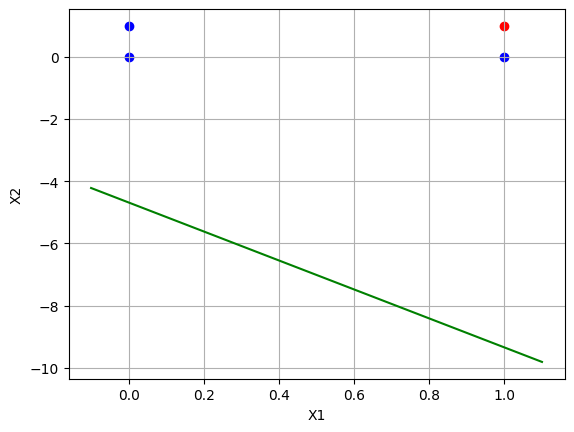

In [761]:
and_gate = Perceptron(2)
x = np.linspace(-0.1, 1.1, 100)
W = and_gate.W
m, b = -(W[0] / W[1]), -(W[2] / W[1])
plt.plot(x, linear(x, m, b), color='green')
plot_data(X_train, y_train)

In [762]:
and_gate.train(X_train, y_train, epochs=10)

Epoch: 0	Loss: 1.8602106334793205
Epoch: 1	Loss: 2.8602106334793205
Epoch: 2	Loss: 1.8602106334793205
Epoch: 3	Loss: 0.8602106334793205
Epoch: 4	Loss: 0.8602106334793205
Epoch: 5	Loss: 0.8602106334793205
Epoch: 6	Loss: 0.8602106334793205
Epoch: 7	Loss: 0.8602106334793205
Epoch: 8	Loss: 0.8602106334793205
Epoch: 9	Loss: 0.8602106334793205


#### Hyperplane (green line) after training.

In [763]:
print(f"Weights:\n{and_gate.W}\n")

Weights:
[[ 1.96463404]
 [ 0.20675665]
 [-2.03160133]]



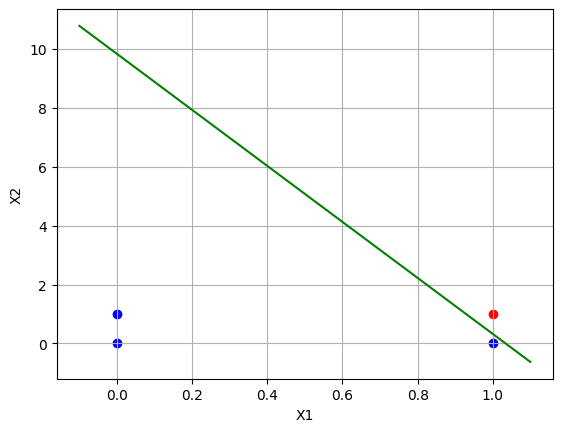

In [764]:
W = and_gate.W
m, b = -(W[0] / W[1]), -(W[2] / W[1])
plt.plot(x, linear(x, m, b), color='green')
plot_data(X_train, y_train)

In [765]:
print(and_gate(X_train))

[[0]
 [0]
 [0]
 [1]]


### Variant 2: Handle weights and bias separately

In [766]:
def step(x: np.array) -> np.array:
    return np.where(x >= 0.0, 1, 0)

In [767]:
class Perceptron:
    def __init__(self, num_features: int) -> None:
        self.w = np.random.rand(num_features, 1)
        self.b = np.random.rand(1, 1)

    def __call__(self, x: np.array) -> int:
        z = np.dot(x, self.w) + self.b
        return step(z)

    def train(self, X: np.array, y: np.array, epochs: int = 1, learning_rate: float=0.1, verbose: bool=True) -> None:
        for epoch in range(epochs):
            total_loss = 0 
            for i in range(len(X)):
                # Forward pass
                z = np.dot(X[i:i+1], self.w) + self.b
                a = step(z)

                # Backward pass
                error = y[i:i+1] - a
                total_loss += np.sum(error ** 2)

                dw = 2 * error * X[i:i+1].T
                db =  2 * error

                # Update weights and bias. 
                self.w += learning_rate * dw
                self.b += learning_rate * db

            if verbose:
                if epoch % 1 == 0:
                    print(f"Epoch: {epoch}\tLoss: {total_loss}")

In [768]:
and_gate = Perceptron(2)
print(f"Weights:\n{and_gate.w}\n")
print(f"Bias:\n{and_gate.b}")

Weights:
[[0.43389362]
 [0.55351823]]

Bias:
[[0.70643732]]


### Hyperplane (green line) before training.

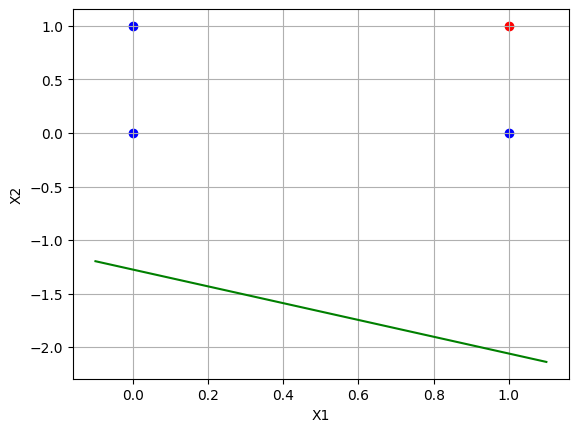

In [769]:
W, B = and_gate.w, and_gate.b
m, b = -(W[0] / W[1]), -(B[0] / W[1])
plt.plot(x, linear(x, m, b), color='green')
plot_data(X_train, y_train)

In [770]:
and_gate.train(X_train, y_train, epochs=10, learning_rate=0.1)

Epoch: 0	Loss: 3
Epoch: 1	Loss: 2
Epoch: 2	Loss: 0
Epoch: 3	Loss: 0
Epoch: 4	Loss: 0
Epoch: 5	Loss: 0
Epoch: 6	Loss: 0
Epoch: 7	Loss: 0
Epoch: 8	Loss: 0
Epoch: 9	Loss: 0


### Hyperplane (green line) after training.

In [771]:
print(f"Weights:\n{and_gate.w}\n")
print(f"Bias:\n{and_gate.b}")

Weights:
[[0.23389362]
 [0.15351823]]

Bias:
[[-0.29356268]]


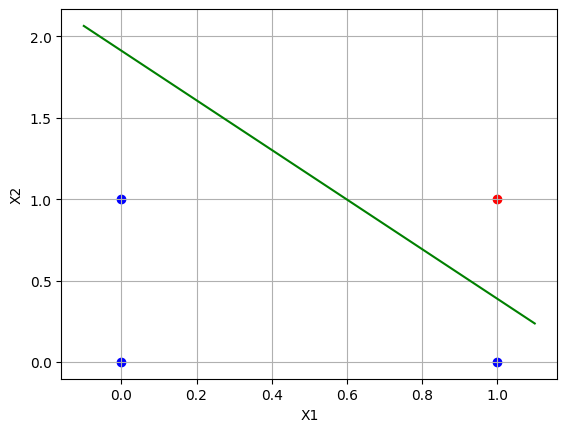

In [772]:
W, B = and_gate.w, and_gate.b
m, b = -(W[0] / W[1]), -(B[0] / W[1])
plt.plot(x, linear(x, m, b), color='green')
plot_data(X_train, y_train)

In [773]:
print(and_gate(X_train))

[[0]
 [0]
 [0]
 [1]]


[[ 2.60079763 -3.03331135]
 [ 1.68438438 -1.47126754]
 [ 1.68768352 -1.71079779]
 [ 1.48147356 -0.51036668]
 [ 1.36884289 -0.80290961]]
[[1]
 [1]
 [1]
 [1]
 [1]]


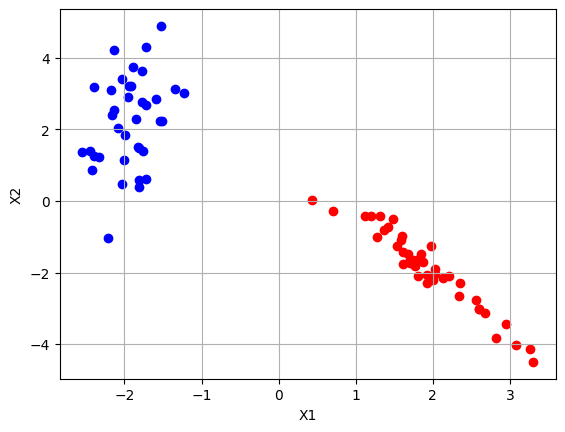

In [774]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Step 1: Generate linearly separable data using sklearn's make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, class_sep=2, 
                           random_state=41)

# Step 2: Split data into training and testing datasets (for example, 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Reshape y_train and y_test to match Keras's expected input shape
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Now your data is ready for use in a Keras model
print(X_train[:5])  # First 5 rows of X_train
print(y_train[:5])  # First 5 rows of y_train
plot_data(X_train, y_train)
perceptron = Perceptron(len(X_train[0]))


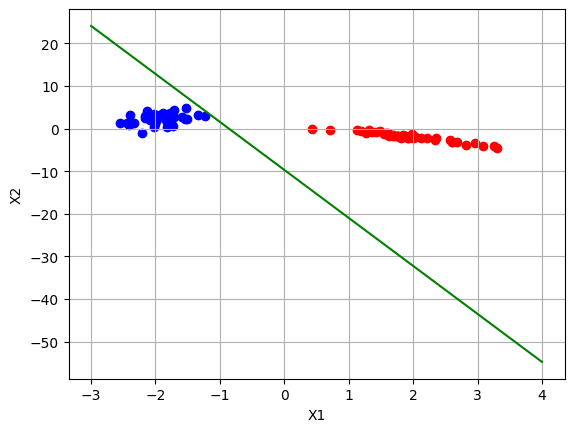

In [775]:
perceptron = Perceptron(2)
perceptron.train(X_train, y_train, epochs=1000, learning_rate=0.01, verbose=False)
x = np.linspace(-3, 4, 1000)
W, B = perceptron.w, perceptron.b
m, b = -(W[0] / W[1]), -(B[0] / W[1])
plt.plot(x, linear(x, m, b), color='green')
plot_data(X_train, y_train)